In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import itertools
import ot
import glob
import os
from utils.utils import *

In [5]:
dotmark_pictures_path = "..\\DOTmark_1.0\\Pictures\\"
full_path = os.path.join(os.getcwd(), dotmark_pictures_path)
resolution = 32
image_numbers = ['01','02','03','04','05','06','07','08','09','10']
pairs = list(itertools.combinations(image_numbers, 2))

categories_pattern = os.path.join(dotmark_pictures_path, "*")
category_dirs = glob.glob(categories_pattern)
category_names = [os.path.basename(category) for category in category_dirs if os.path.isdir(category)]

In [6]:
def Fourier2(a, b, T=2 * np.pi):
    pipi = 2 * np.pi
    # normalizzo a e b
    [m, n] = np.shape(a)
    # somma_a=np.sum(a)
    # somma_b=np.sum(b)
    dxdy = (T / m) * (T / n)
    # for k in range(m):
    #     for l in range(n):
    #         a[k,l]=a[k,l]/somma_a
    #         b[k,l]=b[k,l]/somma_b
    a = a / np.sum(a)
    b = b / np.sum(b)
    # calcolo valori attesi e vettore per la traslazione
    valore_atteso_a = np.zeros(2, float)
    valore_atteso_b = np.zeros(2, float)
    for s in range(m):
        for q in range(n):
            valore_atteso_a[0] += a[s, q] * s
            valore_atteso_b[0] += b[s, q] * s
            valore_atteso_a[1] += a[s, q] * q
            valore_atteso_b[1] += b[s, q] * q

    vettore_traslazione = valore_atteso_b - valore_atteso_a

    fa = np.fft.fft2(a)
    fb = np.fft.fft2(b)
    # calcolo distanza
    integrale = 0
    if m % 2 == 0 and n % 2 == 0:
        for y in range(n):
            for x in range(m):
                if y == 0:
                    if 0 < x <= int(m / 2):
                        trasl = np.e ** ((2 * np.pi * 1j * vettore_traslazione[0] * x) / m) * np.e ** (
                                    (2 * np.pi * 1j * vettore_traslazione[1] * y) / n)
                        integrale += ((np.abs(fa[x, y] - fb[x, y] * trasl)) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 2) + 0)) * dxdy
                if 1 <= y < n / 2:
                    trasl = np.e ** ((2 * np.pi * 1j * vettore_traslazione[0] * x) / m) * np.e ** (
                                (2 * np.pi * 1j * vettore_traslazione[1] * y) / n)
                    integrale += ((np.abs(fa[x, y] - fb[x, y] * trasl)) ** 2) / (
                                (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 2) + 0)) * dxdy
                if y == n / 2:
                    if x <= int(n / 2):
                        trasl = np.e ** ((2 * np.pi * 1j * vettore_traslazione[0] * x) / m) * np.e ** (
                                    (2 * np.pi * 1j * vettore_traslazione[1] * y) / n)
                        integrale += ((np.abs(fa[x, y] - fb[x, y] * trasl)) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 2) + 0)) * dxdy
    if m % 2 != 0 and n % 2 != 0:
        for y in range(n):
            for x in range(m):
                if y == 0:
                    if 0 < x <= int(m / 2):
                        trasl = np.e ** ((2 * np.pi * 1j * vettore_traslazione[0] * x) / m) * np.e ** (
                                    (2 * np.pi * 1j * vettore_traslazione[1] * y) / n)
                        integrale += ((np.abs(fa[x, y] - fb[x, y] * trasl)) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 2) + 0)) * dxdy
                if 1 <= y <= int(n / 2):
                    trasl = np.e ** ((2 * np.pi * 1j * vettore_traslazione[0] * x) / m) * np.e ** (
                                (2 * np.pi * 1j * vettore_traslazione[1] * y) / n)
                    integrale += ((np.abs(fa[x, y] - fb[x, y] * trasl)) ** 2) / (
                                (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 2) + 0)) * dxdy

    C = (((1 / T) ** 2) * 2 * integrale) ** (1 / 2)
    distanza = np.sqrt((C ** 2) + ((vettore_traslazione[0] ** 2) + (vettore_traslazione[1] ** 2)))

    return (distanza)

In [7]:
def Fourier1(a, b, T=2 * np.pi):
    pipi = 2 * np.pi
    # normalizzo a e b
    [m, n] = np.shape(a)
    # somma_a=np.sum(a)
    # somma_b=np.sum(b)
    dxdy = (T / m) * (T / n)
    # for k in range(m):
    #     for l in range(n):
    #         a[k,l]=a[k,l]/somma_a
    #         b[k,l]=b[k,l]/somma_b
    a = a / np.sum(a)
    b = b / np.sum(b)
    fa = np.fft.fft2(a)
    fb = np.fft.fft2(b)
    # calcolo distanza
    integrale = 0
    if m % 2 == 0 and n % 2 == 0:
        for y in range(n):
            for x in range(m):
                if y == 0:
                    if 0 < x <= int(m / 2):
                        integrale += ((np.abs(fa[x, y] - fb[x, y])) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 1) + 0)) * dxdy
                if 1 <= y < n / 2:
                    integrale += ((np.abs(fa[x, y] - fb[x, y])) ** 2) / (
                                (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 1) + 0)) * dxdy
                if y == n / 2:
                    if x <= int(n / 2):
                        integrale += ((np.abs(fa[x, y] - fb[x, y])) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 1) + 0)) * dxdy
    if m % 2 != 0 and n % 2 != 0:
        for y in range(n):
            for x in range(m):
                if y == 0:
                    if 0 < x <= int(m / 2):
                        integrale += ((np.abs(fa[x, y] - fb[x, y])) ** 2) / (
                                    (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 1) + 0)) * dxdy
                if 1 <= y <= int(n / 2):
                    integrale += ((np.abs(fa[x, y] - fb[x, y])) ** 2) / (
                                (np.sqrt(((x * pipi / m) ** 2) + ((y * pipi / n) ** 2))) ** ((2 * 1) + 0)) * dxdy

    C = (((1 / T) ** 2) * 2 * integrale) ** (1 / 2)
    distanza = C

    return (distanza)

In [13]:
def calculate_costs(size, distance_metric='L1'):
    """
    This function of an array or image and calculates the cost from it to itself.

    Parameters:
    - `size` (int or tuple): representing the object on which we would like to calculate costs.

    Returns:
    - `costs` (numpy.ndarray): A 2D array representing the matrix of costs of transporting pixels
                                from the first image to the second image.
    """

    # Helper function for L1 and L2 distance
    if distance_metric == 'L1':
        dist = lambda a, b: abs(a - b)
    elif distance_metric == 'L2':
        dist = lambda a, b: (a - b) ** 2
    else:
        raise ValueError('Invalid distance metric. Must be either "L1" or "L2".')

    # 1D case:
    if isinstance(size, int):
        X = np.linspace(0, 1, size)
        costs = np.zeros([size, size], np.float64)

        for it1 in range(size):
            for it2 in range(size):
                costs[it1, it2] = dist(X[it1], X[it2])

        return costs

    # 2D case:
    elif len(size) == 2:
        m, n = size
        I, J = np.indices(size)
        
        # Flatten the indices to create 1D arrays of x and y coordinates
        I_flat = I.flatten()
        J_flat = J.flatten()
        
        # Calculate distances using broadcasting
        if distance_metric == 'L1':
            costs = np.abs(I_flat[:, None] - I_flat[None, :]) + np.abs(J_flat[:, None] - J_flat[None, :])
        elif distance_metric == 'L2':
            costs = np.sqrt((I_flat[:, None] - I_flat[None, :]) ** 2 + (J_flat[:, None] - J_flat[None, :]) ** 2)
        else:
            raise ValueError('Invalid distance metric. Must be either "L1" or "L2".')

        return costs

## Images, $W_2$ vs $f_{2,2}$

In [9]:
pfm_values_normal = []
pfm_values_shifted = []
w_values = []

for category in category_names:
    category_dir = os.path.join(full_path, category)
    start = time.time()
    for image_pair in pairs:
        # Loading and normalizing images
        path_im1 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[0]}.png")
        im1 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)
        im1 = cv2.resize(im1, (resolution, resolution))
        im1 = im1 / im1.sum()  # Normalize
        path_im2 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[1]}.png")
        im2 = cv2.imread(path_im2, cv2.IMREAD_GRAYSCALE)
        im2 = cv2.resize(im2, (resolution, resolution))
        im2 = im2 / im2.sum()  # Normalize
        
        pfm = Fourier2(im1, im2)
        pfm_values_normal.append(pfm)

        #Calculate the EMD
        cost_matrix = calculate_costs(im1.shape, distance_metric = 'L2')
        w_dist = ot.emd2(im1.flatten(), im2.flatten(), cost_matrix)
        w_values.append(w_dist)
    
    end = time.time()
    print(f'{end - start} Time elapsed for Category {category}')

5.294147253036499 Time elapsed for Category CauchyDensity
7.875199556350708 Time elapsed for Category ClassicImages
6.945636034011841 Time elapsed for Category GRFmoderate
7.470234155654907 Time elapsed for Category GRFrough
7.3038856983184814 Time elapsed for Category GRFsmooth
5.477611303329468 Time elapsed for Category LogGRF
6.276434659957886 Time elapsed for Category LogitGRF
3.831871747970581 Time elapsed for Category MicroscopyImages
2.425787925720215 Time elapsed for Category Shapes
7.3997697830200195 Time elapsed for Category WhiteNoise


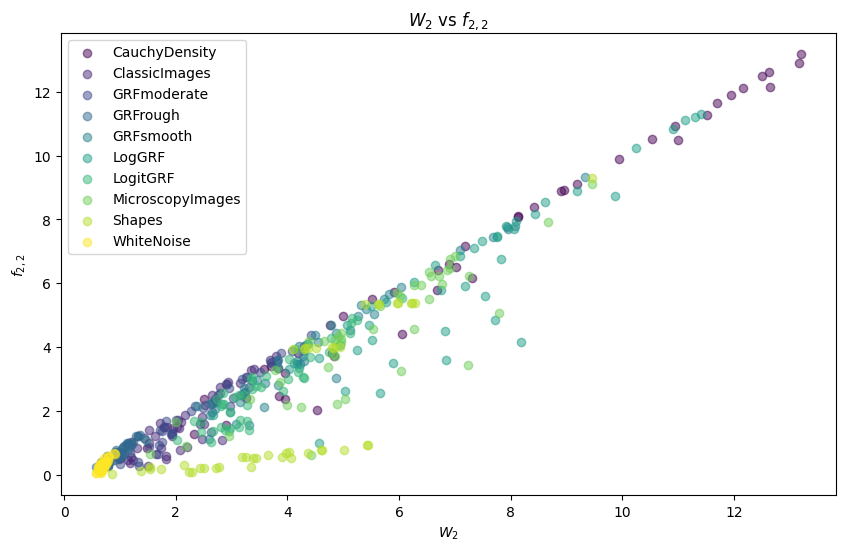

In [10]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 10))  # 10 distinct colors
for i in range(10):  # 10 groups of 45 samples each
    start = i * 45
    end = (i + 1) * 45
    plt.scatter(w_values[start:end], pfm_values_normal[start:end], color=colors[i], alpha=0.5, label=f'{category_names[i]}')
plt.title('$W_2$ vs $f_{2,2}$')
plt.xlabel('$W_2$')
plt.ylabel('$f_{2,2}$')
plt.legend()
plt.show()

In [44]:
ratios = np.array(w_values) / np.array(pfm_values_normal)

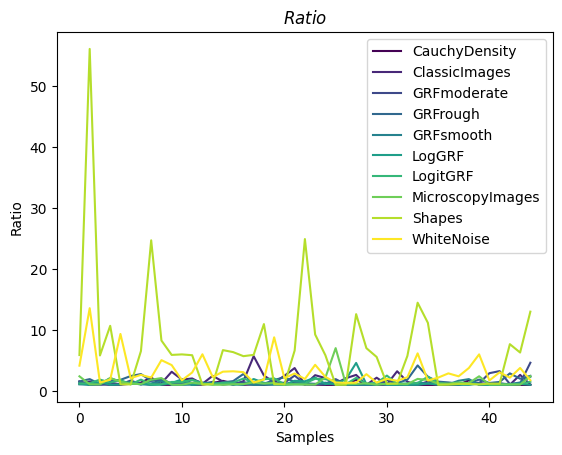

In [45]:
for i in range(10):
    start = i * 45
    end = (i + 1) * 45
    plt.plot(ratios[start:end], color=colors[i], label=f'{category_names[i]}')

plt.xlabel('Samples')
plt.ylabel('Ratio')
plt.legend()
plt.title('$Ratio$')
plt.show()

## Images, $W_1$ vs $f_{1,2}$

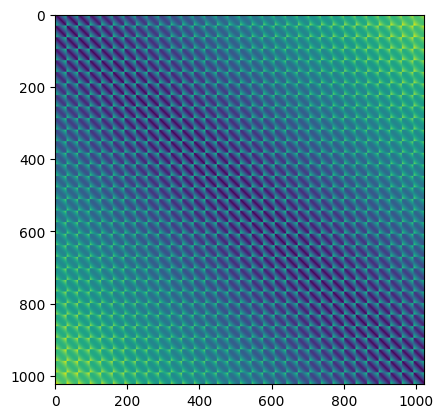

In [18]:
cost_matrix_l2 = calculate_costs(im1.shape, distance_metric = 'L2')
plt.imshow(cost_matrix_l2, cmap='viridis')

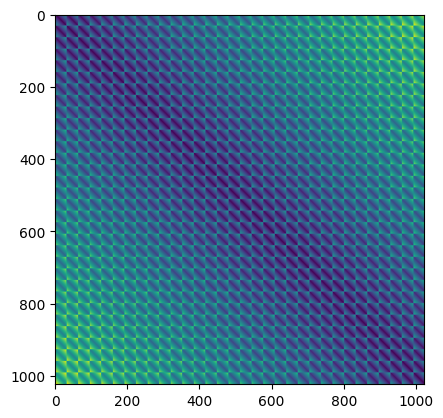

In [17]:
cost_matrix = calculate_costs(im1.shape, distance_metric = 'L1')
plt.imshow(cost_matrix, cmap='viridis')

In [15]:
pfm_values_normal = []
pfm_values_shifted = []
w_values = []

for category in category_names:
    category_dir = os.path.join(full_path, category)
    start = time.time()
    for image_pair in pairs:
        # Loading and normalizing images
        path_im1 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[0]}.png")
        im1 = cv2.imread(path_im1, cv2.IMREAD_GRAYSCALE)
        im1 = cv2.resize(im1, (resolution, resolution))
        im1 = im1 / im1.sum()  # Normalize
        path_im2 = os.path.join(category_dir, f"picture{resolution}_10{image_pair[1]}.png")
        im2 = cv2.imread(path_im2, cv2.IMREAD_GRAYSCALE)
        im2 = cv2.resize(im2, (resolution, resolution))
        im2 = im2 / im2.sum()  # Normalize
        
        pfm = Fourier1(im1, im2)
        pfm_values_normal.append(pfm)

        #Calculate the EMD
        cost_matrix = calculate_costs(im1.shape, distance_metric = 'L1')
        w_dist = ot.emd2(im1.flatten(), im2.flatten(), cost_matrix)
        w_values.append(w_dist)
    
    end = time.time()
    print(f'{end - start} Time elapsed for Category {category}')

2.891695261001587 Time elapsed for Category CauchyDensity
4.7252843379974365 Time elapsed for Category ClassicImages
4.170247793197632 Time elapsed for Category GRFmoderate
5.283406496047974 Time elapsed for Category GRFrough
3.8835220336914062 Time elapsed for Category GRFsmooth
3.3169586658477783 Time elapsed for Category LogGRF
3.9400110244750977 Time elapsed for Category LogitGRF
2.344027280807495 Time elapsed for Category MicroscopyImages
1.4553320407867432 Time elapsed for Category Shapes
6.382643461227417 Time elapsed for Category WhiteNoise


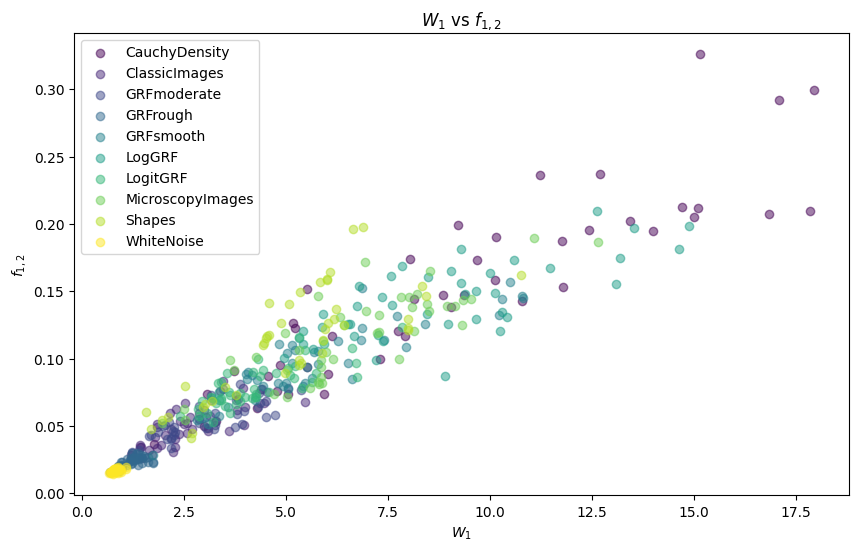

In [16]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 10))  # 10 distinct colors
for i in range(10):  # 10 groups of 45 samples each
    start = i * 45
    end = (i + 1) * 45
    plt.scatter(w_values[start:end], pfm_values_normal[start:end], color=colors[i], alpha=0.5, label=f'{category_names[i]}')
plt.title('$W_1$ vs $f_{1,2}$')
plt.xlabel('$W_1$')
plt.ylabel('$f_{1,2}$')
plt.legend()
plt.show()

In [ ]:
ratios = np.array(w_values) / np.array(pfm_values_normal)

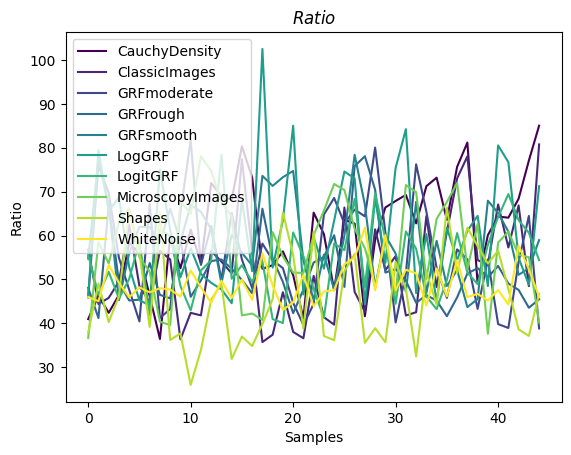

In [ ]:
for i in range(10):
    start = i * 45
    end = (i + 1) * 45
    plt.plot(ratios[start:end], color=colors[i], label=f'{category_names[i]}')

plt.xlabel('Samples')
plt.ylabel('Ratio')
plt.legend()
plt.title('$Ratio$')
plt.show()